<center><h1>Project</h1></center>
<center><h3> Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning
* Understanding Data Visualization

#### Level : Intermediate




### Data Analytics of Hotel Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Abnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of  Data:

People's main criteria when visiting new places are reasonable accommodation and food. Hopitality is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset 



This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help hotel in improving its services.  



## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [2]:
#import libraries
import pandas as pd
import numpy as np



#visualisations
import seaborn as sb
import matplotlib.pyplot as plt

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize']=15,10

In [3]:
## Read the csv file
df=pd.read_csv('C:/Users/vasun/Downloads/archive/Abnb_Open_Data.csv',low_memory=False)


In [4]:
## Display the first 5 rows
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
## Display the data types
df.dtypes


id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset.
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [6]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [7]:
#Drop some of the unwanted columns. These include host id, id, country and country code from the dataset.
df.drop(columns=['id','host id','country','country code'], axis=1, inplace=True)

In [8]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')

In [9]:
#State the reason for not including these columns for your Data Analytics.
## 1) The reason for not including host and host id is we are trying to analyse the aggregated data 
##    try to find the results based of geographical location not on individuals based on ids.
## 2) Country and Country code is dropped because the entire dataset belongs to the US for analysis we dont require this data.

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [10]:
## Check for missing values in the dataframe and display the count in ascending order.  
df.isnull().sum().sort_values()

room type                              0
lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64

In [11]:
#If the values are missing, impute the values as per the datatype of the columns.
for col in df.columns:
    if df[str(col)].dtype == 'object':
        print(col)
        df[str(col)].fillna(value=df[str(col)].mode()[0],inplace=True)
    else:
        df[str(col)].fillna(value=df[str(col)].median(),inplace=True)


NAME
host_identity_verified
host name
neighbourhood group
neighbourhood
instant_bookable
cancellation_policy
room type
price
service fee
last review
house_rules
license


In [12]:
df.isnull().sum().sort_values()

NAME                              0
availability 365                  0
calculated host listings count    0
review rate number                0
reviews per month                 0
last review                       0
number of reviews                 0
minimum nights                    0
service fee                       0
price                             0
Construction year                 0
room type                         0
cancellation_policy               0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood group               0
host name                         0
host_identity_verified            0
house_rules                       0
license                           0
dtype: int64

In [13]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
df.shape

(102599, 22)

In [14]:
df.duplicated().sum()

3461

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
## Display the total number of records in the dataframe after removing the duplicates.
df.shape

(99138, 22)

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [17]:
## Rename the column.
df.rename(columns={'availability 365':'days_booked' }, inplace= True)
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

In [18]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
df.columns = [col.lower().replace(" ","_") for col in df.columns]
df.columns

Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

In [19]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
def remove_dollar_comma_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return value.replace("$","").replace(",","")
#defined the function above and calling the function inside the lamda function too emove the dollar sign and comma from the columns
df['price'] = df['price'].apply(lambda x: remove_dollar_comma_sign(x))
df['service_fee'] = df['service_fee'].apply(lambda x: remove_dollar_comma_sign(x))

In [20]:
#check whether  removed the dollar sign and comma from the columns
df[['price', 'service_fee']].head()

,price,service_fee
0,966,193
1,142,28
2,620,124
3,368,74
4,204,41


In [21]:
#If necessary, convert these two columns to the appropriate data type
df['price'] = df['price'].astype(int)
df['service_fee'] = df['service_fee'].astype(int)

In [22]:
#check whether converted these two columns to the appropriate data type
df[['price', 'service_fee']].dtypes

price          int32
service_fee    int32
dtype: object

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [23]:
## List the count of various room types avaliable with Abnb
df['room_type'].value_counts()


Entire home/apt    51987
Private room       44887
Shared room         2149
Hotel room           115
Name: room_type, dtype: int64

In [24]:
## Which room type adheres to more strict cancellation policy
df_group_prep = df[df['cancellation_policy']== 'strict'] 
df_group_prep['room_type'].value_counts()

Entire home/apt    17238
Private room       14936
Shared room          718
Hotel room            34
Name: room_type, dtype: int64

In [25]:
## List the average prices by neighborhood group 
grp_avg=df['price'].groupby(df['neighbourhood_group']).mean().sort_values(ascending=False).reset_index()
grp_avg


,neighbourhood_group,price
0,Queens,628.668822
1,Brooklyn,625.471627
2,Bronx,625.271511
3,Staten Island,625.060870
4,Manhattan,621.666140
5,brookln,580.000000
6,manhatan,460.000000


In [26]:
## And mention which is the most expensive neighborhood group for rentals
most_expensive_neighborhood_group = grp_avg.iloc[0]['neighbourhood_group']
print(f"\nMost Expensive Neighborhood Group for Rentals: {most_expensive_neighborhood_group}")


Most Expensive Neighborhood Group for Rentals: Queens


## Task 5a: Data Visualization (Any Tool)

* List the count of various room types avaliable with Airnb
* Which room type adheres to more strict cancellation policy
* List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
* List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
* List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
* List the prices with respect to room type using a bar graph and also state your inferences.
* Create a pie chart that shows  distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

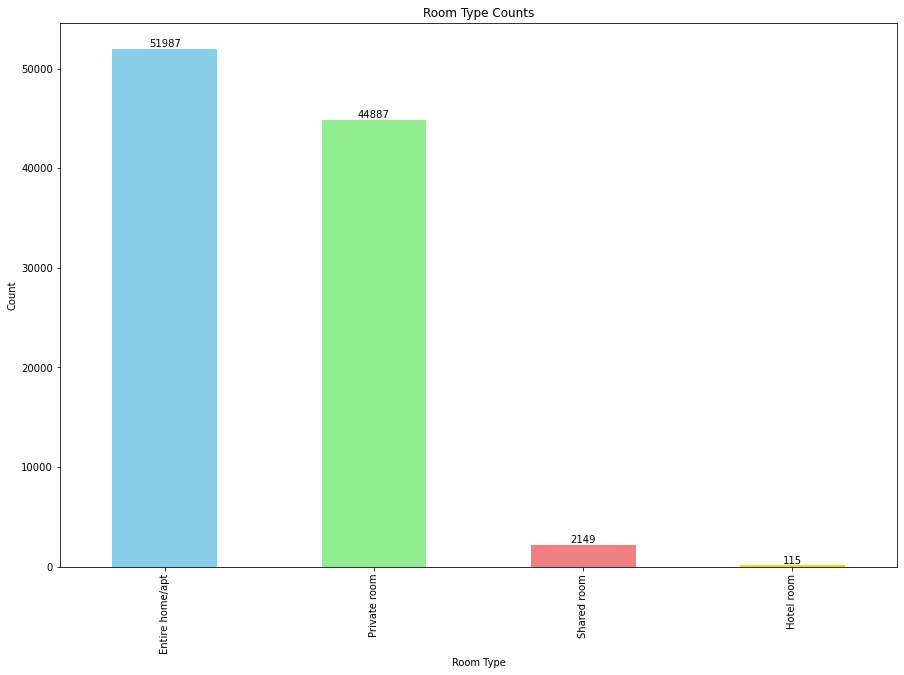

In [27]:
#List the count of various room types avaliable with Airnb


# Calculate room type counts
room_type_counts = df['room_type'].value_counts()

# Plot the bar chart with different colors for each room type
room_type_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])

# Display the count values on top of each bar
for i, count in enumerate(room_type_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Set chart title and labels
plt.title('Room Type Counts')
plt.xlabel('Room Type')
plt.ylabel('Count')



# Show the chart
plt.show()

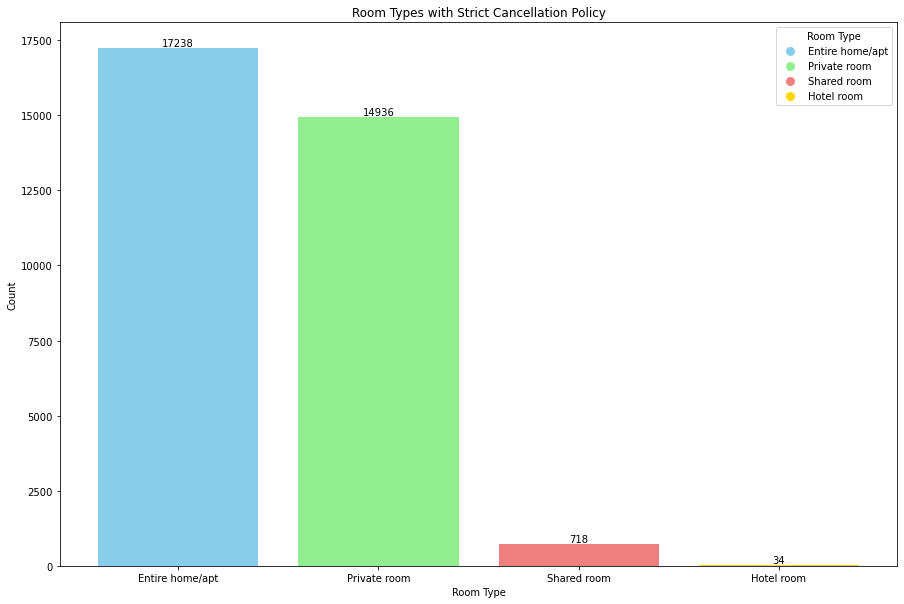

The room type that adheres to a more strict cancellation policy is: Entire home/apt


In [28]:
#Which room type adheres to more strict cancellation policy


# Count the occurrences of each room type
room_type_counts = df_group_prep['room_type'].value_counts()

# Define colors for each room type
colors = {'Entire home/apt': 'skyblue', 'Private room': 'lightgreen', 'Shared room': 'lightcoral', 'Hotel room': 'gold'}

# Plot the bar chart
bars = plt.bar(room_type_counts.index, room_type_counts, color=[colors.get(room_type, 'gray') for room_type in room_type_counts.index])

# Display the count values on top of each bar
for i, count in enumerate(room_type_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Set chart title and labels
plt.title('Room Types with Strict Cancellation Policy')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Add legend at the upper right corner
legend_labels = list(colors.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=colors[label]) for label in legend_labels]
plt.legend(handles=legend_handles, title='Room Type', loc='upper right')

# Show the chart
plt.show()

# Print the room type with the highest count (adheres to more strict cancellation policy)
most_common_room_type = room_type_counts.idxmax()
print(f"The room type that adheres to a more strict cancellation policy is: {most_common_room_type}")

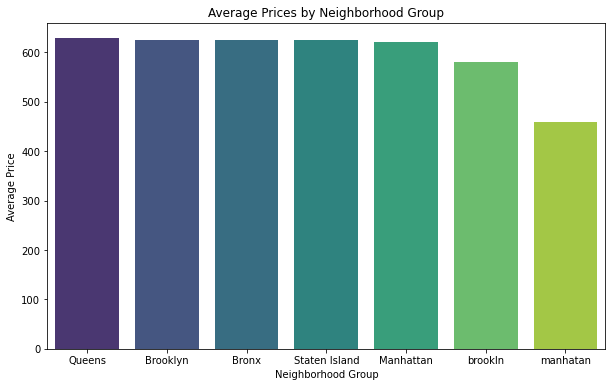


Most Expensive Neighborhood Group for Rentals: Queens


In [29]:
#List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals


# Group by neighborhood group and calculate the mean price
grp_avg = df['price'].groupby(df['neighbourhood_group']).mean().sort_values(ascending=False).reset_index()

# Identify the most expensive neighborhood group
most_expensive_neighborhood_group = grp_avg.iloc[0]['neighbourhood_group']

## Highlight the most expensive neighborhood group
#most_expensive_index = grp_avg[grp_avg['neighbourhood_group'] == most_expensive_neighborhood_group].index[0]
#bars.patches[most_expensive_index].set_facecolor('red')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sb.barplot(x='neighbourhood_group', y='price', data=grp_avg, palette='viridis')

# Set chart title and labels
plt.title('Average Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')

# Show the chart
plt.show()

print(f"\nMost Expensive Neighborhood Group for Rentals: {most_expensive_neighborhood_group}")

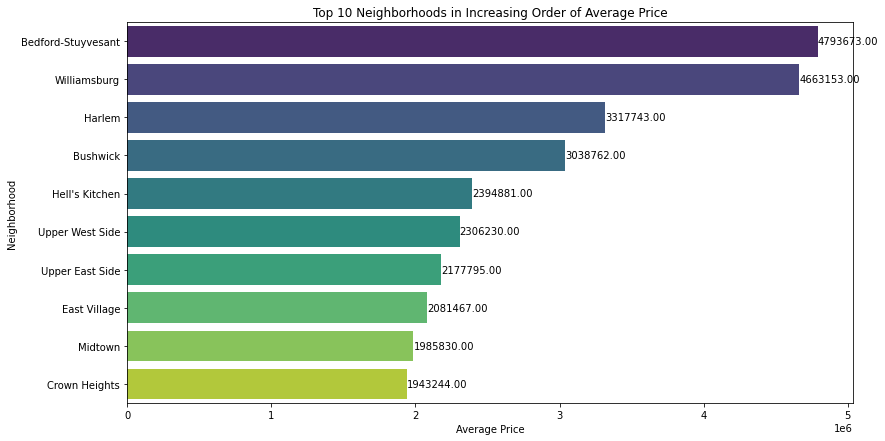

The cheapest neighborhood is: Crown Heights


In [30]:
#List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood

# Group by neighborhood and calculate the price
neighborhood_price = df['price'].groupby(df['neighbourhood']).sum().sort_values(ascending=False).head(10)

# Plot the horizontal bar graph
plt.figure(figsize=(13, 7))
bars = sb.barplot(x=neighborhood_price.values, y=neighborhood_price.index, palette='viridis')

# Set chart title and labels
plt.title('Top 10 Neighborhoods in Increasing Order of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')

# Add data points on the chart
for bar, price, neighborhood in zip(bars.patches, neighborhood_price.values, neighborhood_price.index):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{price:.2f}', ha='left', va='center', color='black')

# Show the chart
plt.show()

# Identify the cheapest neighborhood
cheapest_neighborhood = neighborhood_price.idxmin()
print(f"The cheapest neighborhood is: {cheapest_neighborhood}")

In [31]:
df.columns

Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

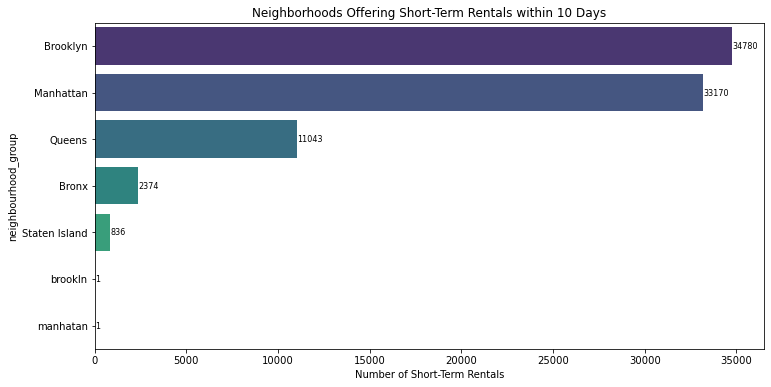

In [32]:
#List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
# Filter data for short-term rentals within 10 days
short_term_rentals = df[df['minimum_nights'] <= 10]

# Count occurrences of each neighborhood
neighborhood_counts = short_term_rentals['neighbourhood_group'].value_counts().reset_index()

# Rename columns for clarity
neighborhood_counts.columns = ['Neighborhood', 'Number of Short-Term Rentals']

# Plot the bar graph
plt.figure(figsize=(12, 6))
bars = sb.barplot(x='Number of Short-Term Rentals', y='Neighborhood', data=neighborhood_counts, palette='viridis')

# Set chart title and labels
plt.title('Neighborhoods Offering Short-Term Rentals within 10 Days')
plt.xlabel('Number of Short-Term Rentals')
plt.ylabel('neighbourhood_group')

# Add data points on the chart
for bar, count in zip(bars.patches, neighborhood_counts['Number of Short-Term Rentals']):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, f'{count}', 
             ha='left', va='center', color='black', fontsize=8)

# Show the chart
plt.show()

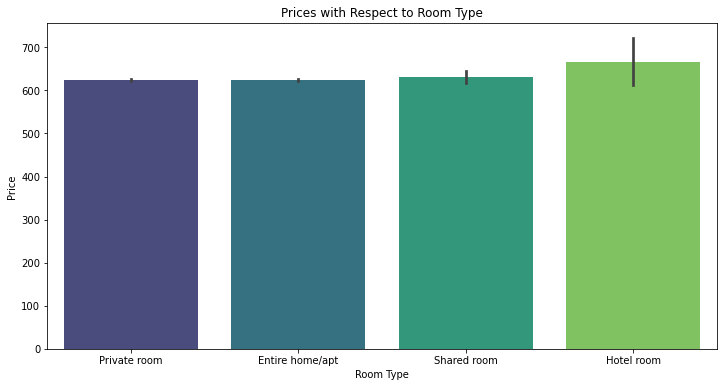

Inferences:
1. Hotel Room: Hotel rooms have the highest average price among the listed room types, suggesting a premium for privacy and amenities,associated with hotel accommodations.
2. Shared Room: Shared rooms are the second-highest in price, providing a cost-effective option compared to hotel rooms,catering to budget-conscious travelers.
3. Entire Home/Apartment: Guests are willing to pay a premium for an entire property, making it the third-highest in average price,Guests seem willing to pay a premium for the privacy and exclusivity of having an entire property to themselves.
4. Private Room: Private rooms have a slightly lower average price compared to entire homes/apartments, offering a balance between privacy and cost,attracting guests who prefer a dedicated space without renting an entire property.


In [33]:
#List the prices with respect to room type using a bar graph and also state your inferences.
plt.figure(figsize=(12, 6))
sb.barplot(x='room_type', y='price', data=df, palette='viridis')

# Set chart title and labels
plt.title('Prices with Respect to Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

# Show the chart
plt.show()
print("Inferences:")
print("1. Hotel Room: Hotel rooms have the highest average price among the listed room types, suggesting a premium for privacy and amenities,associated with hotel accommodations.")
print("2. Shared Room: Shared rooms are the second-highest in price, providing a cost-effective option compared to hotel rooms,catering to budget-conscious travelers.")
print("3. Entire Home/Apartment: Guests are willing to pay a premium for an entire property, making it the third-highest in average price,Guests seem willing to pay a premium for the privacy and exclusivity of having an entire property to themselves.")
print("4. Private Room: Private rooms have a slightly lower average price compared to entire homes/apartments, offering a balance between privacy and cost,attracting guests who prefer a dedicated space without renting an entire property.")

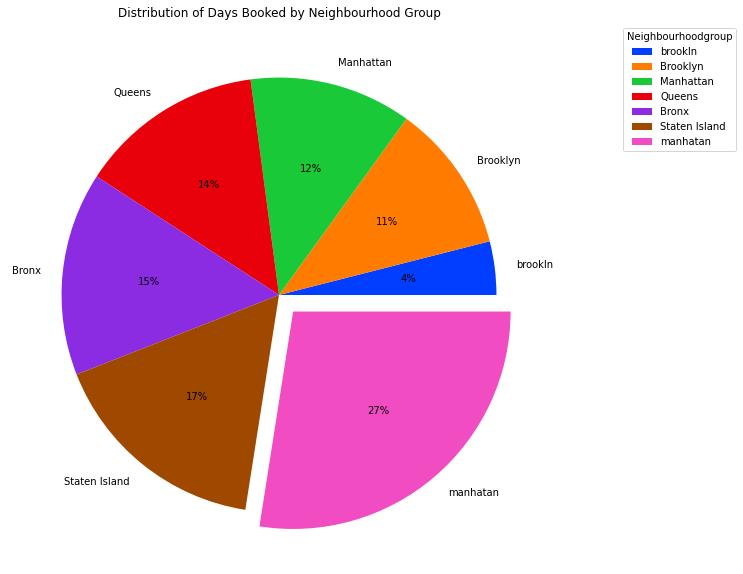

In [34]:
#Create a pie chart that shows distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage


# Assuming 'grp3' is a DataFrame with columns 'neighbourhood_group' and 'days_booked'
grp3 = df['days_booked'].groupby(df['neighbourhood_group']).mean().sort_values().reset_index()

# Define a color palette using Seaborn's 'bright' palette
palette_color = sb.color_palette('bright')

# Find the index of the slice with the highest booking percentage
max_index = grp3['days_booked'].idxmax()

# Create a list to explode the slice with the highest booking percentage
explode_list = [0.1 if i == max_index else 0 for i in range(len(grp3))]

# Create a pie chart using plt.pie
Neighbourhoodgroup = plt.pie(
    grp3['days_booked'],
    labels=grp3['neighbourhood_group'],
    colors=palette_color,
    autopct='%.0f%%',
    explode=explode_list  # Explode the slice with the highest booking percentage
)

# Display the chart title
plt.title('Distribution of Days Booked by Neighbourhood Group')

# Add a legend with a title
plt.legend(title='Neighbourhoodgroup',  bbox_to_anchor=(1.35, 1), loc='upper right')

# Show the pie chart
plt.show()

## Task 5b: Data Visualization (Any Tool)

* Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
* Using a line graph show in which year the maximum construction of rooms took place.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

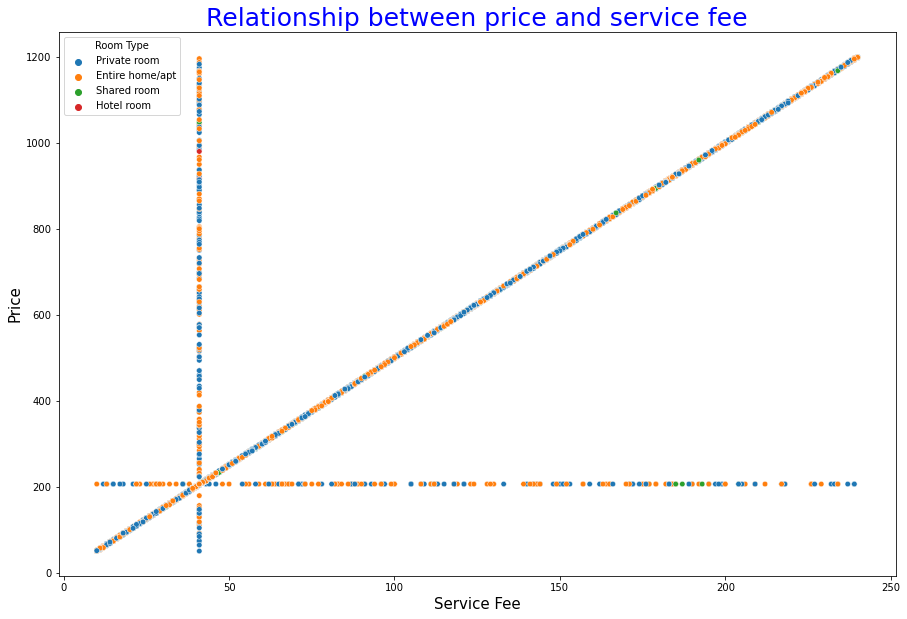

Inferences:
 It suggests a positive correlation and linear trend in relationship. In this case, as service price increases, room price also tends to increase.
A tighter cluster of points suggests a stronger relationship.


In [35]:
##Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences

# Ensure that the plot is displayed inline in the Jupyter Notebook
%matplotlib inline

# Set the default figure size for the plot
plt.rcParams['figure.figsize'] = 15, 10

# Set the title for the plot
plt.title('Relationship between price and service fee', size=25, color='blue')

# Use Seaborn to create a scatter plot
sb.scatterplot(x='service_fee', y='price', data=df, hue='room_type', s=30)

# Add labels to the x-axis and y-axis
plt.xlabel('Service Fee', size=15)
plt.ylabel('Price', size=15)

# Show a legend with room type categories
plt.legend(title='Room Type')

# Show the plot
plt.show()

print("Inferences:")
print(" It suggests a positive correlation and linear trend in relationship. In this case, as service price increases, room price also tends to increase.")
print("A tighter cluster of points suggests a stronger relationship.")


In [36]:
df.columns

Index(['name', 'host_identity_verified', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'days_booked', 'house_rules',
       'license'],
      dtype='object')

In [37]:
df['construction_count']=df['construction_year'].value_counts()


<AxesSubplot:xlabel='construction_year', ylabel='construction_count'>

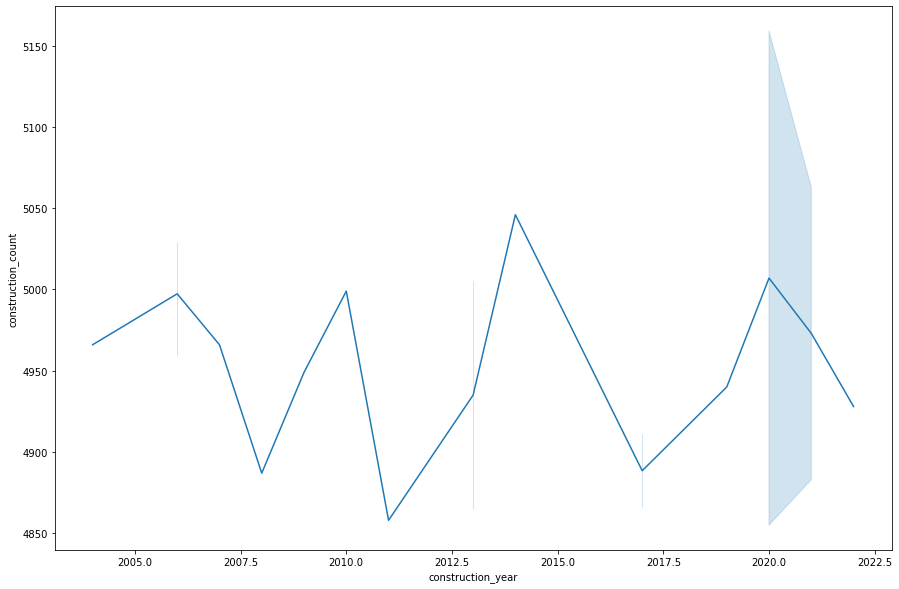

In [38]:
sb.lineplot(x='construction_year',y='construction_count', data=df)

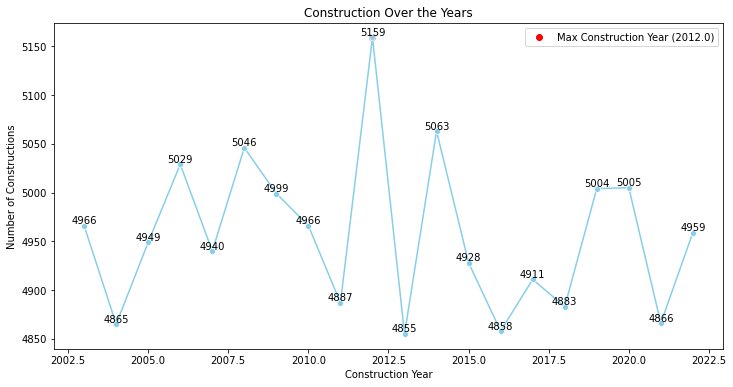

The year with the maximum construction of rooms is: 2012.0


In [39]:

# Calculate the count of constructions for each year
construction_counts = df['construction_year'].value_counts().sort_index().reset_index()
construction_counts.columns = ['construction_year', 'construction_count']

# Find the year with the maximum construction
max_construction_year = construction_counts.loc[construction_counts['construction_count'].idxmax(), 'construction_year']

# Plot the line graph
plt.figure(figsize=(12, 6))
sb.lineplot(x='construction_year', y='construction_count', data=construction_counts, marker='o', color='skyblue')

# Highlight the year with the maximum construction
plt.scatter(max_construction_year, construction_counts.loc[construction_counts['construction_year'] == max_construction_year, 'construction_count'],
            color='red', marker='o', label=f'Max Construction Year ({max_construction_year})')

# Set chart title and labels
plt.title('Construction Over the Years')
plt.xlabel('Construction Year')
plt.ylabel('Number of Constructions')

# Add data points on the line
for i, count in enumerate(construction_counts['construction_count']):
    plt.text(construction_counts['construction_year'][i], count + 0.1, str(count), ha='center', va='bottom')

# Add legend
plt.legend()

# Show the chart
plt.show()

print(f"The year with the maximum construction of rooms is: {max_construction_year}")

## Task 5c: Data Visualization (Any Tool)

* With the help of box plots illustrate the following
 * Effect of Review Rate number on price
 * Effect of host identity verified on price

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

<AxesSubplot:xlabel='review_rate_number', ylabel='price'>

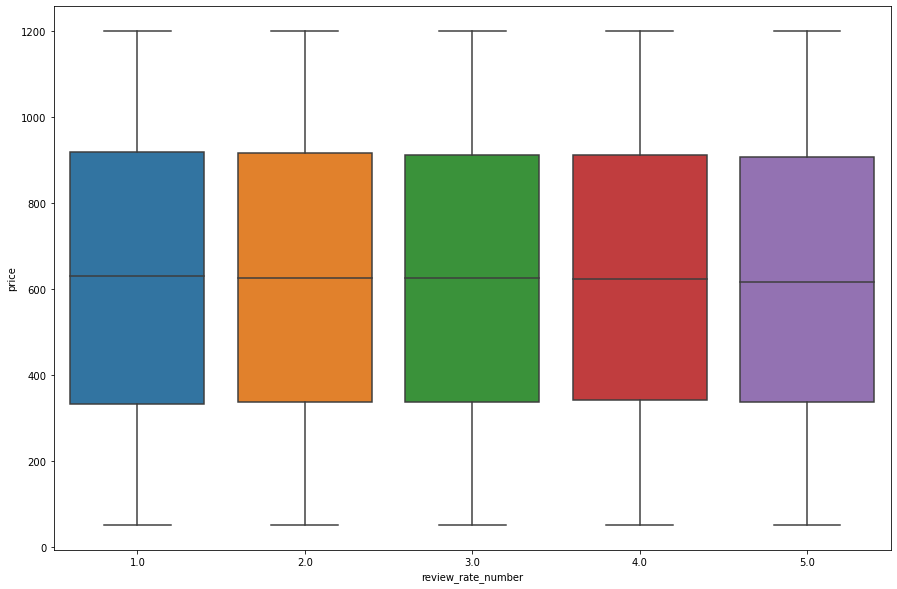

In [40]:
# With the help of box plots illustrate the following
# Effect of Review Rate number on price
sb.boxplot(x='review_rate_number', y='price',data=df)

<AxesSubplot:xlabel='host_identity_verified', ylabel='price'>

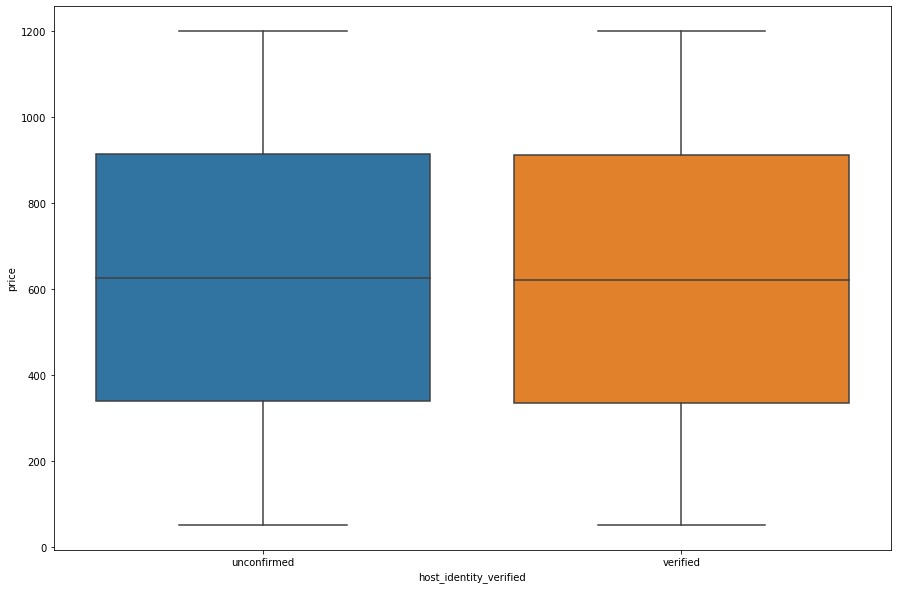

In [41]:
# With the help of box plots illustrate the following
# Effect of host identity verified on price
sb.boxplot(x='host_identity_verified',y='price',data=df)